<a href="https://colab.research.google.com/github/adarshm11/earthquakes-analysis/blob/main/CS_131_Earthquakes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap


### Store the cleaned dataset into a Pandas Dataframe

In [8]:
file_path = '/content/drive/MyDrive/kaggle/cleaned_earthquakes_data.csv'

df = pd.read_csv(file_path)

### Unit Tests to ensure there are no empty cells in the cleaned dataset

In [9]:
import unittest
import os

class TestDataFrame(unittest.TestCase):

    def setUp(self):
        self.file_path = '/content/drive/MyDrive/kaggle/cleaned_earthquakes_data.csv'
        try:
            self.df = pd.read_csv(self.file_path)
        except FileNotFoundError:
            self.fail(f"File not found: {self.file_path}.  Make sure the file exists and the path is correct.")

    def test_no_empty_cells(self):
        columns_to_check = ['magnitude', 'date', 'time', 'felt', 'tsunami', 'latitude', 'longitude', 'location']
        for col in columns_to_check:
            self.assertFalse(self.df[col].isnull().values.any(), f"Column '{col}' contains empty cells.")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.035s

OK


# Visualizing the top 20 magnitude Earthquakes


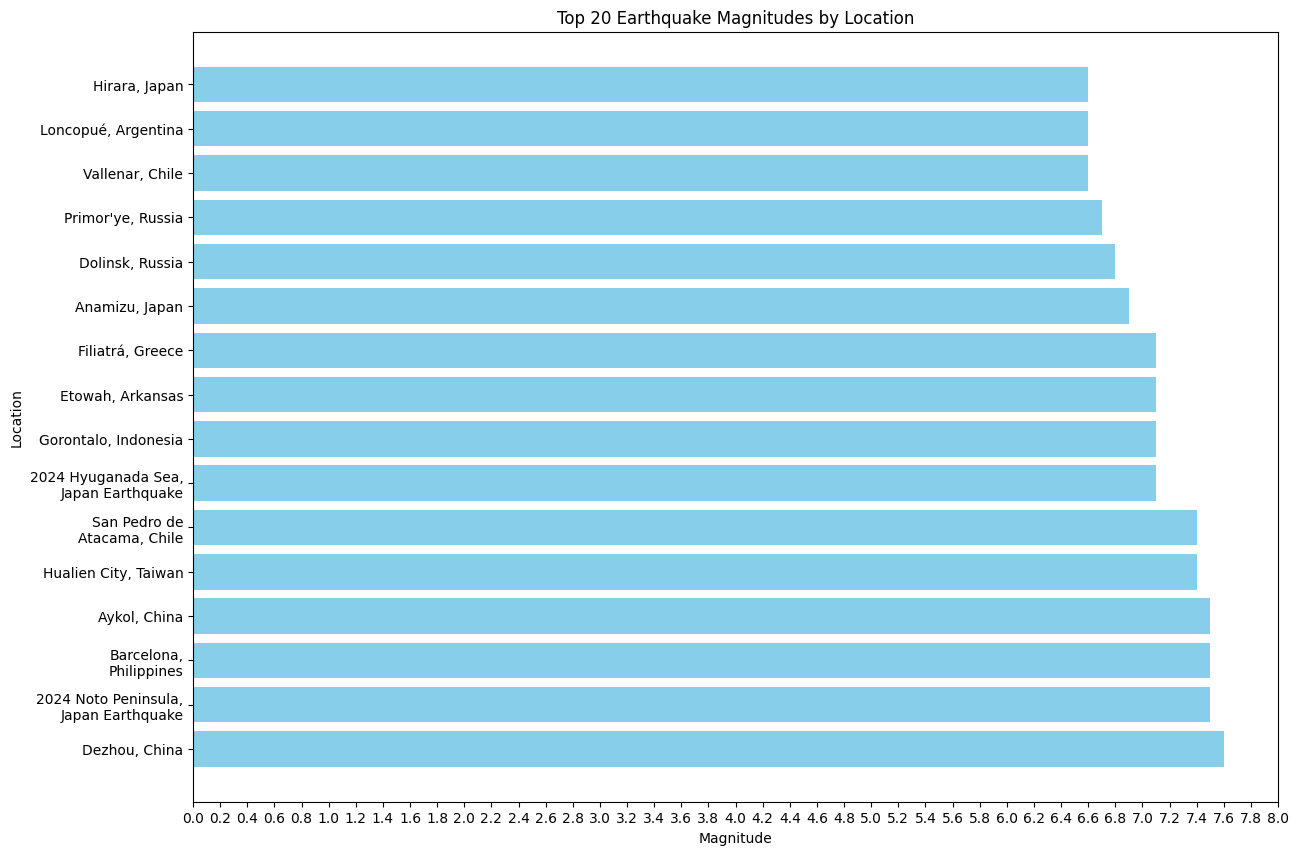

In [10]:
top_20 = df.nlargest(20, 'magnitude')

# Extract 'location' and 'magnitude' columns
locations = top_20['location']
magnitudes = top_20['magnitude']

# Function to wrap long location names
def wrap_labels(labels, width=20):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Wrap the location labels if they are long
wrapped_locations = wrap_labels(locations)

# Create the figure with more height to prevent clustering
plt.figure(figsize=(14, 10))

# Create a horizontal bar plot
plt.barh(wrapped_locations, magnitudes, color='skyblue')

plt.xlabel('Magnitude')
plt.ylabel('Location')
plt.title('Top 20 Earthquake Magnitudes by Location')

plt.xticks(np.arange(0, 8.2, 0.2))

# Show the plot
plt.show()



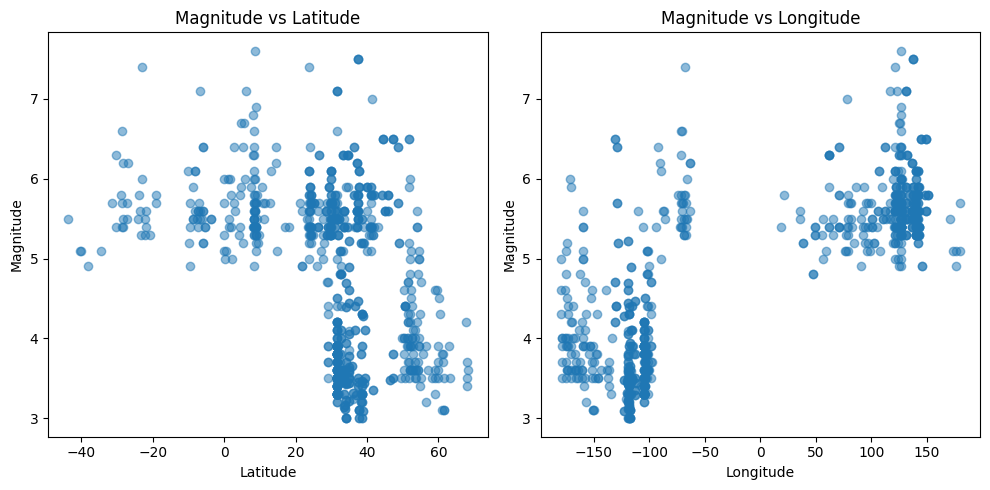

In [13]:
plt.figure(figsize=(10, 5))

# Magnitude vs Latitude
plt.subplot(1, 2, 1)
plt.scatter(df['latitude'], df['magnitude'], alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Magnitude')
plt.title('Magnitude vs Latitude')

# Magnitude vs Longitude
plt.subplot(1, 2, 2)
plt.scatter(df['longitude'], df['magnitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Magnitude')
plt.title('Magnitude vs Longitude')

plt.tight_layout()
plt.show()


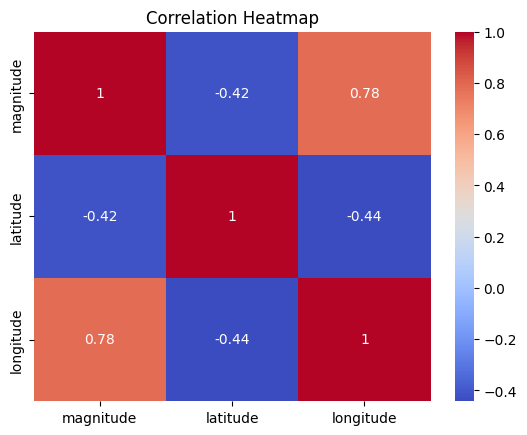

In [14]:
import seaborn as sns

correlation_matrix = df[['magnitude', 'latitude', 'longitude']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation betwen magnitude and latitude: -0.4187837258882539
Correlation between magnitude and longitude: 0.7838025200577978
